In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import emoji

In [2]:
# Charger les deux fichiers CSV
silver_I = pd.read_csv('data/silver_2009_2010.csv')
silver_II = pd.read_csv('data/silver_2011.csv')

# Concaténer les deux DataFrames
df = pd.concat([silver_I, silver_II], ignore_index=True)

In [3]:
# Convertir la colonne "InvoiceDate" en format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Découpage du dataset par année :
mask_2009_2010 = (df['InvoiceDate'].dt.year < 2011)

#Commandes effectuées en 2009 et 2010
df_2009_2010 = df[mask_2009_2010]
#Commandes effectuées en 2011
df_2011 = df[~mask_2009_2010]

In [4]:
pd.set_option('display.max_columns', None)

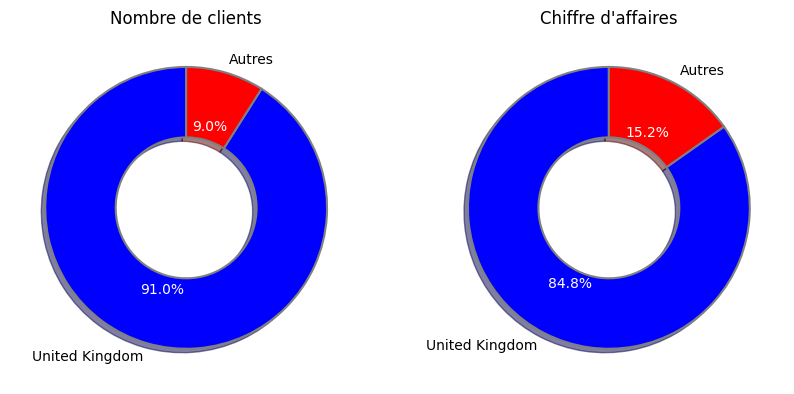

In [6]:
import matplotlib.pyplot as plt

# Calculer les valeurs pour le premier pie chart (nombre de clients)
uk_customer_count = df[df['Country'] == 'United Kingdom']['Customer ID'].nunique()
other_customer_count = df[df['Country'] != 'United Kingdom']['Customer ID'].nunique()
customer_values = [uk_customer_count, other_customer_count]
customer_labels = ['United Kingdom', 'Autres']

# Calculer les valeurs pour le deuxième pie chart (chiffre d'affaires)
uk_revenue = df[df['Country'] == 'United Kingdom']['Total'].sum()
other_revenue = df[df['Country'] != 'United Kingdom']['Total'].sum()
revenue_values = [uk_revenue, other_revenue]
revenue_labels = ['United Kingdom', 'Autres']

# Créer la figure et les axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Titres des pie charts
ax1.set_title("Nombre de clients")
ax2.set_title("Chiffre d'affaires")

# Créer le premier pie chart (nombre de clients)
wedges1, texts1, autotexts1 = ax1.pie(customer_values, labels=customer_labels, colors=['b', 'r'], startangle=90,
                                      wedgeprops=dict(width=0.5, edgecolor='r'), shadow=True,
                                      autopct='%1.1f%%')

# Créer le deuxième pie chart (chiffre d'affaires)
wedges2, texts2, autotexts2 = ax2.pie(revenue_values, labels=revenue_labels, colors=['b', 'r'], startangle=90,
                                      wedgeprops=dict(width=0.5, edgecolor='w'), shadow=True,
                                      autopct='%1.1f%%')

# Ajouter du relief aux pie charts
for wedge1, text1, autotext1, wedge2, text2, autotext2 in zip(wedges1, texts1, autotexts1, wedges2, texts2, autotexts2):
    wedge1.set_edgecolor('gray')
    wedge1.set_linewidth(1.5)
    autotext1.set_color('white')
    wedge2.set_edgecolor('gray')
    wedge2.set_linewidth(1.5)
    autotext2.set_color('white')

# Afficher les pie charts
plt.show()

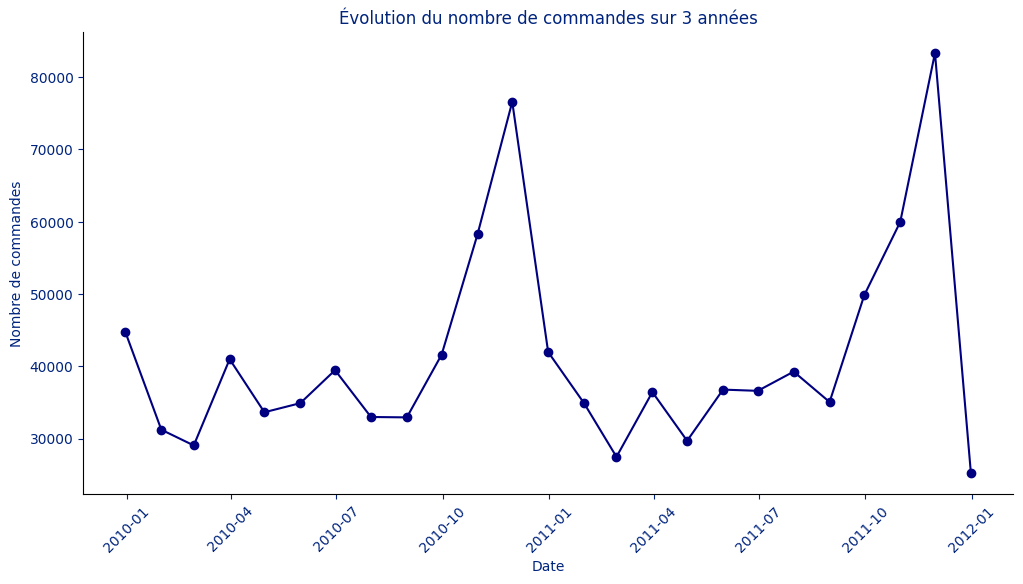

In [7]:
import matplotlib.pyplot as plt

# Grouper les données par intervalle et compter le nombre de commandes
df_grouped = df.groupby(pd.Grouper(key='InvoiceDate', freq='M')).size()

# Création du graphique
plt.figure(figsize=(12, 6))

# Tracé de la courbe avec des points reliés par une droite
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='navy')

# Personnalisation des axes et du titre
plt.xlabel('Date')
plt.ylabel('Nombre de commandes')
plt.title('Évolution du nombre de commandes sur 3 années')

# Personnalisation des ticks de l'axe des x
plt.xticks(rotation=45)

# Définition des couleurs du thème du Royaume-Uni
colors = ['#00247d', '#cf142b', '#ffffff']

# Application des couleurs aux éléments du graphique
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', colors=colors[0])
plt.gca().yaxis.label.set_color(colors[0])
plt.gca().xaxis.label.set_color(colors[0])
plt.title('Évolution du nombre de commandes sur 3 années', color=colors[0])

# Affichage du graphique
plt.show()


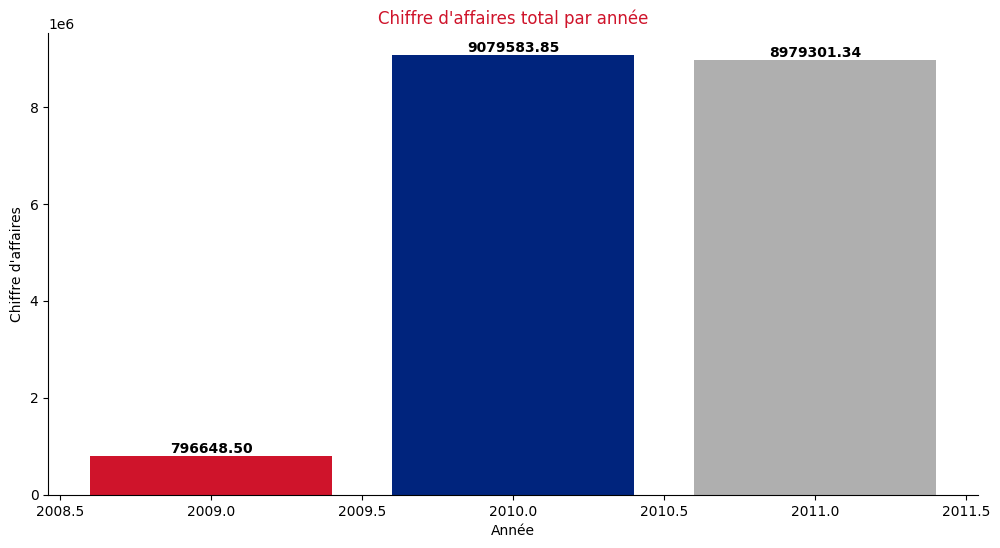

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer le chiffre d'affaires total par année
df_revenue = df.groupby(pd.Grouper(key='InvoiceDate', freq='Y'))['Total'].sum()

# Création du graphique
plt.figure(figsize=(12, 6))

# Tracé du barplot du chiffre d'affaires par année avec des couleurs personnalisées
colors = ['#cf142b','#00247d','#afafaf']
plt.bar(df_revenue.index.year, df_revenue.values, color=colors)

# Ajouter les valeurs du chiffre d'affaires au-dessus de chaque barre avec une police en gras
for x, y in zip(df_revenue.index.year, df_revenue.values):
    plt.text(x, y, f"{y:.2f}", ha='center', va='bottom', fontweight='bold')

# Personnalisation des axes et du titre
plt.xlabel('Année')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires total par année', color=colors[0])

# Amélioration esthétique : suppression des bordures du graphique
sns.despine()

# Affichage du graphique
plt.show()

In [9]:
# Filtrer les données pour les commandes annulées
cancelled_orders = df[df['Cancelled'] == True]

# Compter le nombre total de commandes annulées
cancelled_orders_count = len(cancelled_orders)

# Création du pie chart avec Plotly
fig = px.pie(values=[cancelled_orders_count, len(df) - cancelled_orders_count],
             names=['Commandes annulées', 'Commandes non annulées'],
             title='Répartition du nombre de commandes annulées')

# Réduire la taille de la figure
fig.update_layout(width=300, height=300)

# Appliquer le thème du Royaume-Uni
fig.update_layout(title_font=dict(color='white'))

# Ajouter un trou de 0.5 au centre du pie chart
fig.update_traces(hole=0.5)
fig.update_layout(title='Répartition du nombre de commandes annulées')
# Affichage du pie chart
fig.show()



In [10]:
df.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,Order_Quantity,Order_Total,Cancelled,Order_count,Cancelled_order_count,Percent_cancelled,Average_Quantity,Average_Price,Average_Basket,StockCode_count,Recency,Flag
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,166,505.3,False,10,0.0,0.0,9.08,12.41,63.16,51,738,🇬🇧
